#  The Sparks Foundation

### Data Science and Business Analytics 

### Author - Shivam Kumar

### GRIP - OCTOBER'21
#### TASK - 3 Prediction using Supervised ML

 - Predict the percentage of a student based on no. of study hours.
 - This is Simple Linear Regression task as it involves just 2 Variables.
 - Data Set - http://bit.ly/w-data


## Importing Libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Reading data from link provided
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [46]:
pd.DataFrame(df.shape,index=['Row','Column'],columns=[1])

,1
Row,25
Column,2


 - There are 25 Rows and 2 Columns present in this Dataset.

### Checking Duplicate value

In [49]:
df.duplicated().sum()

0

 - There are No Duplicate value present in this Dataset.

### Basic Info of the Dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Statistical information

In [51]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Columns And Their Data Types

In [52]:
df.dtypes.to_frame('Data type')

,Data type
Hours,float64
Scores,int64


### Checking Missing Values

In [53]:
df.isnull().sum().to_frame('Missing_Count')

,Missing_Count
Hours,0
Scores,0


 - There are no missing values in the Dataset.

### Plotting the data (Hours vs Score)

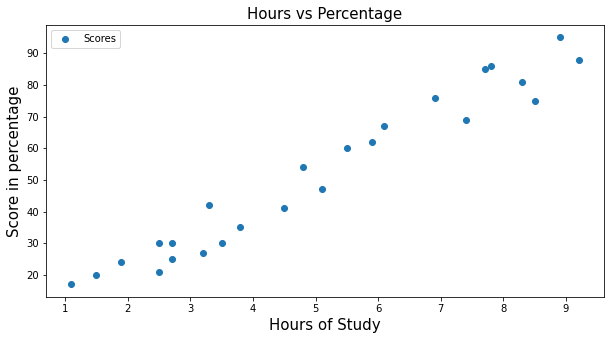

In [54]:
df.plot(x='Hours',y='Scores',style='o',figsize=(10,5))
plt.title("Hours vs Percentage",fontsize=15)
plt.xlabel("Hours of Study",fontsize=15)
plt.ylabel("Score in percentage",fontsize=15)
plt.show()

## Preparing the Data

### Seperating Independent and Dependent variable

In [55]:
X = df[['Scores']]
y = df['Scores']

### Spliting data into train and test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [57]:
print(X_train.shape,X_test.shape)

(17, 1) (8, 1)


In [58]:
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

y_train:  (17,)
y_test:  (8,)


## Training the Algorithm

In [59]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


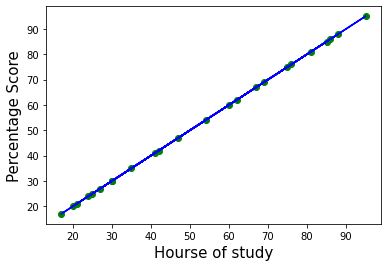

In [60]:
# Plotting the fitted line of the regressor
plt.scatter(X,y,color='green')
plt.plot(X, line, color='blue')
plt.xlabel("Hourse of study",fontsize=15)
plt.ylabel("Percentage Score",fontsize=15)
plt.show()

### Making predictions on test data and compairing with original values

In [61]:
predictions = regressor.predict(X_test)
print("Test Predictions are: ",predictions)

Test Predictions are:  [20. 27. 69. 30. 62. 35. 24. 86.]


In [62]:
# Comparing the test predictions with original values
comapred_data = pd.DataFrame({"Actual score":y_test,"Predicted score":predictions})

In [63]:
comapred_data

,Actual score,Predicted score
5,20,20.0
2,27,27.0
19,69,69.0
16,30,30.0
11,62,62.0
22,35,35.0
17,24,24.0
24,86,86.0


In [64]:
accuracy = regressor.score(X_test,y_test)
print(f"Accuracy of the model is: {round(accuracy*100,2)} %")

Accuracy of the model is: 100.0 %


In [65]:
# Predicting the score for Hrs = 9.25
Hrs = 9.25
prediction = regressor.predict([[Hrs]])
print("Hours of study: ",Hrs)
print(f"Predicted score in % is: {round(prediction[0],2)} %")

Hours of study:  9.25
Predicted score in % is: 9.25 %


## Evaluating the Model

 - To see how different models will perform on the same data we'll evaluate performance of the algorithm. We'll use 2 metrics. Mean square error and mean absolute error

In [43]:
from sklearn import metrics
print("Mean Square Error: ",metrics.mean_squared_error(y_test,predictions))
print("Root mean square error: ",metrics.mean_absolute_error(y_test,predictions))

Mean Square Error:  1.735493991486226e-28
Root mean square error:  1.0658141036401503e-14


### ----------------------------------- Thank You ----------------------------------------------